In [159]:
import pandas as pd
import os, re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
stemmer = PorterStemmer()
from string import punctuation
from random import seed
import numpy as np
seed(1000)

In [220]:
 def removePuncs(text):
        puncs = [i for i in punctuation]
        for i in puncs:
            text = text.replace(i,"")
        return text


def preProcess(text):
    #remove punctuations
    text = removePuncs(text)

    #split text to words
    words = [word.strip().lower() for word in text.split()]
    #remove stopwords and numbers
    stops = stopwords.words('english')
    words = [word for word in words if word not in stops and word.isalpha()]
    #pos_tag words
    tagged = pos_tag(words)
    #remove unwanted tags
    #tagged = [tag for tag in tagged if tag[1] not in self.negtags]
    words = [word[0] for word in tagged]
    #stem words
    words = [stemmer.stem(word) for word in words]
    #join words to form sentence
    sentence = " ".join([word.strip() for word in words])
    return sentence


def termsPercentile(termsScores):
    percentiles = []
    for percentile in range(0,101,5):
        percentiles.append((percentile,np.percentile(termsScores, percentile)))
    final = pd.DataFrame(percentiles)
    final.columns = ["percentile", "score"]
    final['diffed'] = [0]+[round(final.score[i]-final.score[i-1],1) for i in range(1,len(aptp))]
    return final
        
        

def CyberRelatedness(text, lexicon, scores):
    #lexicon is a dataframe of terms with their corresponding APMIS scores:columns labelled "terms", "apmis"
    #text is a single string input of text to be measured for degree of cyber-relatedness
    
    #get length of text
    text = text.strip().lower()
    sentLength = len(text.split())
    
    
    counter=[]
    
    for term in range(0,len(lexicon['terms'])):
        if lexicon['terms'][term] in text:
            counter.append(lexicon[scores][term])
            
            
    if len(counter) > 0:
        
        term_strength = sum(counter)/len(counter)
        sent_strength = (len(counter)/sentLength)*100
        
        return sent_strength
    else:
        return 0
    
    return counter

In [5]:
#read in test corpus files
basedir = "../DataCollection/corpus"
files = [basedir+"/"+i for i in os.listdir(basedir)]

In [6]:
data = []
for i in files:
    try:
        with open(i, "r+", encoding="utf-8") as ff:
            data.append(ff.readlines())
        ff.close()
    except:
        pass

In [7]:
data = [i for i in data if len(i) ==5]

In [8]:
source = [i[0].strip() for i in data]
category = [i[1].strip() for i in data]
classed = [i[2].strip() for i in data]
text = [i[4].strip() for i in data]

In [9]:
data = pd.DataFrame([source, category, classed, text]).transpose()
data.columns = ["source", "category", "classed", "text"]

In [10]:
data.head()

,source,category,classed,text
0,linkedin,networking,NonCyber,Rewarding experience to influence positively t...
1,stackx,qanda,Cyber,You can add a domain group to a local group vi...
2,bbc,publishing,Cyber,Apple chipmaker recovers from malware hit. Tai...
3,bbc,publishing,NonCyber,Ex-Labour leader condemns Corbyn over anti-sem...
4,quora,qanda,Cyber,Cyberespionage is the practice of using inform...


In [11]:
data['classed'].value_counts()

Cyber       111
NonCyber    101
Name: classed, dtype: int64

In [12]:
data['source'].unique()

array(['linkedin', 'stackx', 'bbc', 'quora', 'steemit', 'reddit',
       'hackernews', 'facebook'], dtype=object)

In [13]:
pd.crosstab(data.source, data.classed)

classed,Cyber,NonCyber
source,,
bbc,15,15
facebook,15,13
hackernews,14,0
linkedin,9,14
quora,15,15
reddit,15,15
stackx,14,14
steemit,14,15


In [19]:
#read in scores
apmis =  pd.read_csv("../../BuildingCyberLexicon/Analysis/absapmis.csv")
tfidf = pd.read_csv("../../BuildingCyberLexicon/Analysis/tfidf_scores.csv")
fdr = pd.read_csv("../../BuildingCyberLexicon/Analysis/frequency_degree_ratio.csv")

## TERMS SELECTION

In [20]:
apmis.head()

,Unnamed: 0,terms,apmis
0,user,user,5.220217
1,actual,actual,5.111989
2,window,window,5.026499
3,write,write,3.913943
4,updat,updat,3.810726


In [106]:
aptp = termsPercentile(apmis.apmis)
aptp.to_csv("apmisPercentile.csv")
aptp

,percentile,score,diffed
0,0,-1.289451,0.0
1,5,-1.162939,0.1
2,10,-1.051182,0.1
3,15,-0.936679,0.1
4,20,-0.835521,0.1
5,25,-0.734556,0.1
6,30,-0.647370,0.1
7,35,-0.542739,0.1
8,40,-0.443825,0.1
9,45,-0.312003,0.1


In [30]:
tfidf.head()

,Unnamed: 0,tdif,terms
0,http,9.750110,http
1,enter,8.599452,enter
2,run,6.099571,run
3,data,5.828301,data
4,free,5.792339,free


In [107]:
tftp= termsPercentile(tfidf.tdif)
tftp.to_csv("tfidfPercentile.csv")
tftp

,percentile,score,diffed
0,0,-0.756527,0.0
1,5,-0.726090,0.0
2,10,-0.697132,0.0
3,15,-0.666464,0.0
4,20,-0.637894,0.0
5,25,-0.608110,0.0
6,30,-0.565212,0.0
7,35,-0.519438,0.0
8,40,-0.463074,0.1
9,45,-0.414721,0.0


In [52]:
fdr.head()

,Unnamed: 0,degree,frequency,ratio,terms
0,administr,5063,625,3.553672,administr
1,agenc,5105,654,3.367843,agenc
2,action,6159,876,2.879637,action
3,analyz,4325,632,2.761541,analyz
4,amount,3599,539,2.656859,amount


In [108]:
fdrtp= termsPercentile(fdr.ratio)
fdrtp.to_csv("fdrPercentile.csv")
fdrtp

,percentile,score,diffed
0,0,-1.549444,0.0
1,5,-1.400336,0.1
2,10,-1.288871,0.1
3,15,-1.141991,0.1
4,20,-1.010212,0.1
5,25,-0.862172,0.1
6,30,-0.692227,0.2
7,35,-0.528262,0.2
8,40,-0.384269,0.1
9,45,-0.224873,0.2


In [111]:
top_apmis = apmis.loc[apmis['apmis'] > 1.321439]
top_tfidf = tfidf.loc[tfidf['tdif'] > 1.090684]
top_fdr = fdr.loc[fdr['ratio'] > 1.382993]

In [120]:
top_apmis.terms

0            user
1          actual
2          window
3           write
4           updat
5          websit
6             run
7           start
8           allow
9      understand
10          usual
11           test
12           tool
13           type
14           time
15         system
16         server
17        account
18        variabl
19           back
20          activ
21         vulner
22         almost
23            web
24         requir
25         simpli
26        address
27           true
28           valu
29         string
          ...    
85        special
86            bit
87         script
88           save
89          build
90         achiev
91          video
92          share
93        automat
94         break.
95           wait
96          prize
97        attempt
98         social
99         thread
100           url
101           usb
102        static
103          term
104          sign
105      unfortun
106         chang
107         separ
108          text
109       

In [112]:
terms = list(set(list(top_apmis.terms)+list(top_tfidf.terms)+list(top_fdr.terms)))
terms = list(set(terms))
terms.sort()
terms

['access',
 'accident',
 'accomplish',
 'accord',
 'account',
 'accur',
 'achiev',
 'action',
 'activ',
 'actual',
 'adapt',
 'addit',
 'address',
 'adjust',
 'admin',
 'administr',
 'advanc',
 'advantag',
 'advertis',
 'advis',
 'affect',
 'agenc',
 'aim',
 'alert',
 'algorithm',
 'alloc',
 'allow',
 'almost',
 'altern',
 'amount',
 'analyz',
 'android',
 'annoy',
 'anonym',
 'answer',
 'api',
 'app',
 'appear',
 'appli',
 'applic',
 'approach',
 'appropri',
 'arbitrari',
 'archiv',
 'argu',
 'articl',
 'aspect',
 'assembl',
 'associ',
 'assum',
 'attach',
 'attack',
 'attempt',
 'authent',
 'author',
 'autom',
 'automat',
 'avail',
 'averag',
 'back',
 'backup',
 'bank',
 'bare',
 'base',
 'basic',
 'bit',
 'breach',
 'break.',
 'brows',
 'bug',
 'build',
 'built',
 'cach',
 'call',
 'capabl',
 'captur',
 'carri',
 'case',
 'certain',
 'certainli',
 'certif',
 'challeng',
 'chang',
 'check',
 'cisco',
 'client',
 'close',
 'cloud',
 'code',
 'collect',
 'combin',
 'comfort',
 'common

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

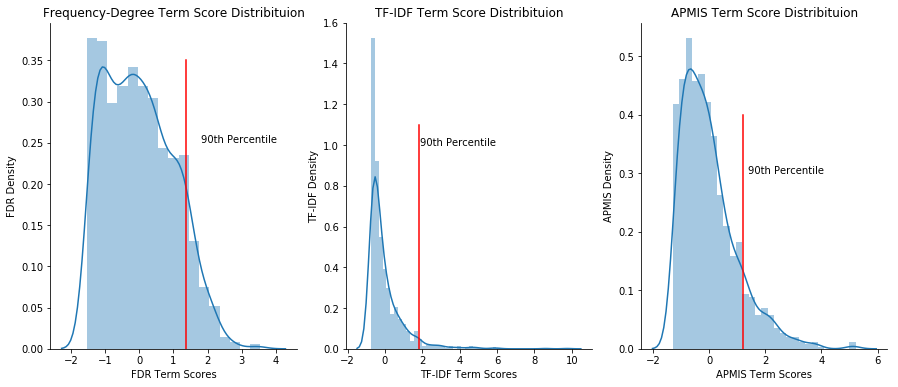

In [115]:
f, axes = plt.subplots(1,3,figsize=(15,6))

ax1 = sns.distplot(fdr.ratio,kde=True, ax=axes[0])
ax1.set_title("Frequency-Degree Term Score Distribituion")
ax1.set_ylabel("FDR Density")
ax1.set_xlabel("FDR Term Scores")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.plot([1.38,1.38],[0,0.35], color='red')
ax1.text(1.8,0.25,"90th Percentile")



ax2=sns.distplot(tfidf.tdif,kde=True, ax=axes[1])
ax2.set_title("TF-IDF Term Score Distribituion")
ax2.set_ylabel("TF-IDF Density")
ax2.set_xlabel("TF-IDF Term Scores")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.plot([1.8,1.8],[0,1.1], color='red')
ax2.text(1.9,1.0,"90th Percentile")



ax3=sns.distplot(apmis.apmis,kde=True, ax=axes[2])
ax3.set_title("APMIS Term Score Distribituion")
ax3.set_ylabel("APMIS Density")
ax3.set_xlabel("APMIS Term Scores")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.plot([1.2,1.2],[0,0.4], color='red')
ax3.text(1.4,0.3,"90th Percentile")

plt.savefig('termScoresDistribution.png')

## Performance Evaluation

In [214]:
def evaluate(ev_data, terms_data, scores):
    applied = [CyberRelatedness(txt, terms_data, scores) for txt in ev_data['text']]
    
    applied = rescale_0_100(applied)
    return applied

In [199]:
data['text'] = [preProcess(i) for i in data.text]

In [200]:
data.head()

,source,category,classed,text
0,linkedin,networking,NonCyber,reward experi influenc posit life sever brazil...
1,stackx,qanda,Cyber,add domain group local group via unattendxml f...
2,bbc,publishing,Cyber,appl chipmak recov malwar hit taiwan compani t...
3,bbc,publishing,NonCyber,exlabour leader condemn corbyn antisemit forme...
4,quora,qanda,Cyber,cyberespionag practic use inform technolog obt...


In [221]:
top_apmis['terms'] = [stemmer.stem(i).strip().lower() for i in top_apmis.terms]
top_apmis['scaled'] = np.interp(top_apmis.apmis, (top_apmis.apmis.min(), top_apmis.apmis.max()), (0,100))
evaluate(data,top_apmis,"apmis")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[188.4186559144192,
 187.6874641929056,
 187.5651620773528,
 187.35860877406947,
 187.35860877406947,
 187.64476816031453,
 187.35860877406947,
 187.50374419070883,
 188.01923386684823,
 187.74213379734383,
 187.70453400629611,
 187.35860877406947,
 188.06245492481867,
 187.6588269962809,
 187.68794930497825,
 187.82545515844228,
 187.6977410345438,
 191.0069752328289,
 187.35860877406947,
 187.35860877406947,
 187.8394559036188,
 188.11246434576543,
 187.35860877406947,
 187.82661125603042,
 187.7140811759236,
 187.35860877406947,
 187.58636878142738,
 187.5906060512852,
 187.68619374285245,
 187.35860877406947,
 187.9106042908116,
 187.35860877406947,
 187.50682374147942,
 187.74917894021576,
 187.35860877406947,
 187.88563917712565,
 188.21093869550242,
 187.6171776371463,
 187.8348454376235,
 187.35860877406947,
 187.35860877406947,
 187.56090821061542,
 187.74156773311594,
 187.57372394734222,
 187.79525089412232,
 189.21381724011778,
 187.51931550993697,
 187.52192674700152,
 187

In [210]:
np.interp(top_apmis.apmis, (top_apmis.apmis.min(), top_apmis.apmis.max()), (0,100))

array([100.        ,  97.22060944,  95.02516158,  66.45368231,
        63.80296903,  63.57470077,  60.91061906,  58.89634313,
        58.39220764,  52.7018044 ,  50.64041976,  49.55807349,
        47.18751079,  46.91393543,  45.59554324,  44.76825577,
        43.16407316,  41.88804112,  40.93894814,  38.21082884,
        38.05614861,  37.04094218,  36.18869488,  35.80710821,
        32.79218668,  32.31299809,  32.08683598,  31.52674228,
        31.45584036,  28.17879288,  28.00310403,  27.83290407,
        27.754492  ,  27.02082562,  26.59643129,  26.0598362 ,
        25.87828982,  25.72248044,  24.96317664,  24.59287613,
        23.80601446,  23.63623324,  23.03841331,  22.93344247,
        22.40073337,  22.10741493,  21.28984969,  21.14952008,
        20.64832857,  20.62763203,  20.47312898,  19.40600012,
        19.34236895,  19.13060501,  19.0326295 ,  18.82299506,
        18.69778724,  18.0794768 ,  17.65986275,  17.45631205,
        16.84124048,  16.65650857,  16.30168278,  16.16

In [139]:
top_apmis.head()

,Unnamed: 0,terms,apmis
0,user,user,5.220217
1,actual,actual,5.111989
2,window,window,5.026499
3,write,write,3.913943
4,updat,updat,3.810726


In [183]:
min(applied)

NameError: name 'applied' is not defined

In [116]:
data.shape

(212, 4)

In [16]:
top_terms.shape

(754, 3)

In [17]:
applied = []
for txt in text:
    applied.append(CyberRelatedness(txt, top_terms))

In [18]:
md=top_terms.scaled.mean()

In [90]:
data['scaled'] = applied
data['classified'] = ["Cyber" if i>19 else "NonCyber" for i in applied]

In [91]:
md

17.96399103847172

In [92]:
data.to_csv("data.csv")

In [93]:
conf_tab=pd.crosstab( data.classified, data.classed)

In [94]:
conf_tab

classed,Cyber,NonCyber
classified,,
Cyber,91,25
NonCyber,26,76


In [95]:
tp = conf_tab.iloc[0,0]
fp = conf_tab.iloc[1,0]
fn = conf_tab.iloc[0,1]
tn = conf_tab.iloc[1,1]

In [96]:
error_rate = (fp+fn)/(fp+fn+tp+tn)
error_rate*100

23.394495412844037

In [97]:
accuracy = (tp+tn)/(fp+fn+tp+tn)
accuracy*100

76.60550458715596

In [98]:
sensitivity = (tp)/(fn+tp)
sensitivity*100

78.44827586206897

In [79]:
specificity = (tn)/(tn+fp)
specificity*100

74.50980392156863

In [80]:
precision = (tp)/(tp+fp)
precision*100

77.77777777777779

In [81]:
fpr = 1-specificity
fpr*100

25.49019607843137

In [16]:
for i in range(0,101,10):
    print(i)

0
10
20
30
40
50
60
70
80
90
100
